<a href="https://colab.research.google.com/github/akib1162100/ML_base/blob/main/ML_asg_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Loading and Exploration

In [4]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Encoding:

In [5]:
df_encoded= pd.get_dummies(df, columns=['Sex'], prefix='', prefix_sep='')

In [6]:
df_encoded.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [7]:
pclass_mapping = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
df_encoded['Pclass_encoded'] = df_encoded['Pclass'].map(pclass_mapping)
df_encoded = df_encoded.drop(columns=['Pclass'])
df_encoded.head(5)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Pclass_encoded
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,Third Class
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,First Class
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,Third Class
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,First Class
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,Third Class


#Standardization:

In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_encoded['Age_robust_scaled'] = scaler.fit_transform(df_encoded[['Age']])

In [15]:
df_encoded = df_encoded.rename(columns={'Age_robust_scaled': 'Age_standardized'})

#Data Visualization

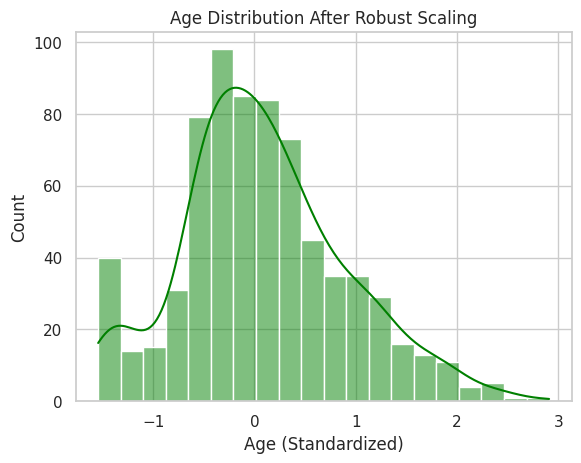

In [18]:
# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a histogram for the 'Age_standardized' column using seaborn
sns.histplot(df_encoded['Age_standardized'], bins=20, kde=True, color='green')

# Label the axes and provide a title
plt.xlabel('Age (Standardized)')
plt.ylabel('Count')
plt.title('Age Distribution After Robust Scaling')

# Display the plot
plt.show()

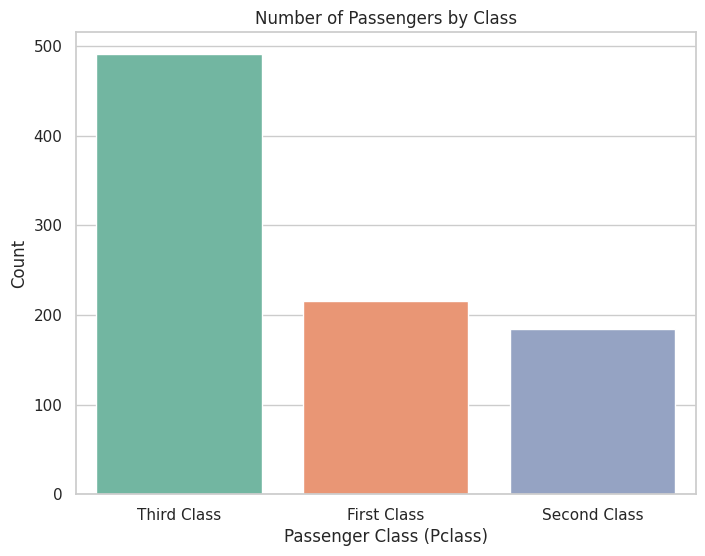

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Use sns.countplot to create the bar plot
sns.countplot(data=df_encoded, x='Pclass_encoded', palette="Set2")

# Label the axes and provide a title
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.title('Number of Passengers by Class')

# Show the plot
plt.show()

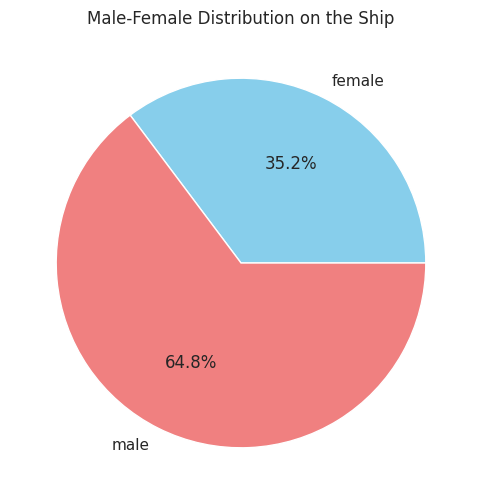

In [27]:
gender_counts = df_encoded[['female', 'male']].sum()

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
sns.set_style("whitegrid")  # Set the style (optional)

# Use sns.pieplot to create the pie chart
plt.pie(gender_counts, labels=['female', 'male'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Male-Female Distribution on the Ship')

# Show the plot
plt.show()